<a href="https://colab.research.google.com/github/Padmanaba231/AI_LAB_PROJECT/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [2]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import torch  
from torchvision import transforms  
from PIL import Image  
import pandas as pd
import random

## Raw Images

What Should I do?
*   Jumlah Gambar ✅
*   Distribusi Dimensi Gambar ✅
*   Dimensi Gambar Terendah ✅
*   Jumlah Format Gambar ✅
*   Menampilkan Beberapa Gambar ✅
*   Color Distribution ✅
*   Identifikasi Kualitas Gambar ✅
*   Konsistensi Gambar (Mencari Sudut Aneh Pada Gambar) ✅
*   Menampilkan Gambar: tanpa orang, satu orang dan lebih dari satu ✅









In [3]:
# Fungsi untuk mendapatkan informasi gambar  
def analyze_images(image_folder):  
    image_data = []  
    formats = []  
    color_distributions = []  
      
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                height, width, channels = img.shape  
                image_data.append((filename, height, width))  
                formats.append(filename.split('.')[-1])  
  
    return image_data, formats
  
# Fungsi untuk menampilkan beberapa gambar  
def display_all_images(image_folder, num_images=5):  
    images = []  
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                images.append(img)  
                if len(images) >= num_images:  
                    break  
  
    plt.figure(figsize=(15, 5))  
    for i, img in enumerate(images):  
        plt.subplot(1, num_images, i + 1)  
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
        plt.axis('off')  
    plt.show()  
  
# Main  
image_folder = 'Data_fixed/Images'  # Ganti dengan path folder gambar Anda  
image_data, formats = analyze_images(image_folder)  

pada kode diatas digunakan untuk menganalisis gambar serta fungsi untuk menampilkan beberapa gambar dari folder

### Jumlah Gambar

In [4]:
#mengetahui jumlah gambarnya
num_images = len(image_data)
print(f'Jumlah gambar keseluruhan: {num_images}')

Jumlah gambar keseluruhan: 2427


### Distribusi Dimensi Gambar

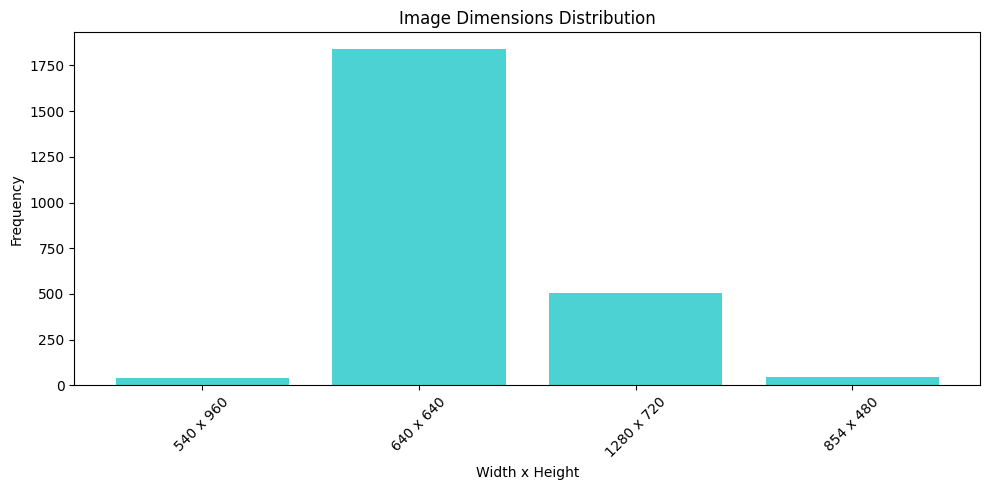

Distribusi dimensi gambar:
Dimensi (960, 540): 38 gambar
Dimensi (640, 640): 1839 gambar
Dimensi (720, 1280): 506 gambar
Dimensi (480, 854): 44 gambar


In [5]:
dimensions = [(height, width) for _, height, width in image_data]  
dimension_counts = Counter(dimensions) 

# data labels dan counts untuk visualisasi data
labels = [f"{width} x {height}" for height, width in dimension_counts.keys()] 
counts = list(dimension_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Distribusi dimensi gambar:")  
for dim, count in dimension_counts.items():  
    print(f"Dimensi {dim}: {count} gambar")  

dari grafik diatas dapat disimpulkan bahwa gambar dengan dimensi 640x640 memiliki dimensi paling banyak dibandingkan dengan dimensi gambar yang lain

### Mencari Gambar dengan Resolusi Terendah

In [6]:
min_dimension = min(dimensions, key=lambda x: x[0] * x[1])  
print(f"Dimensi gambar terendah: {min_dimension}")

Dimensi gambar terendah: (640, 640)


### Distribusi Aspect Ratio

Jumlah aspect ratio setiap gambar :
0.5625 : 38
1.0 : 1839
1.7777777777777777 : 506
1.7791666666666666 : 44


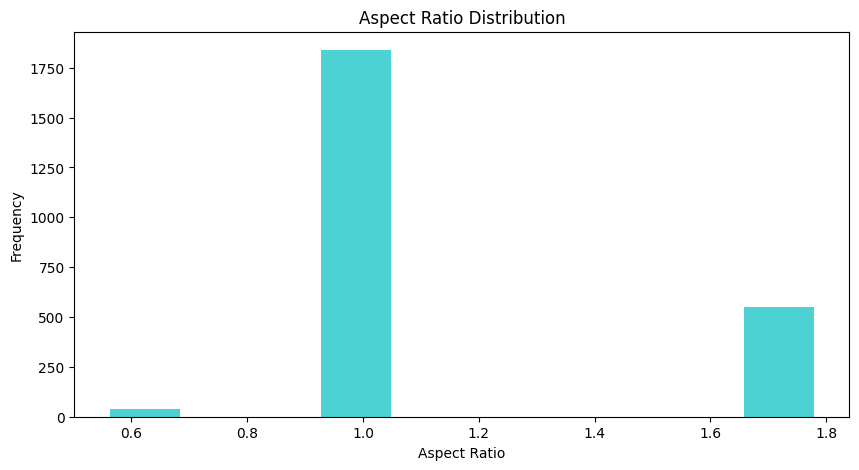

In [7]:
aspect_ratios = [(width / height) for _, height, width in image_data]  

aspect_ratios_counts = Counter(aspect_ratios)

print("Jumlah aspect ratio setiap gambar :")
for label, count in aspect_ratios_counts.items():  
    print(f'{label} : {count}') 

plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=10, color='c', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

dari histogram diatas dapat disimpulkan bahwa mayoritas gambar sebagaian besar berada di rasio 1.0 atau gambar mayoritas memiliki bentuk persegi

### Jumlah Format Gambar

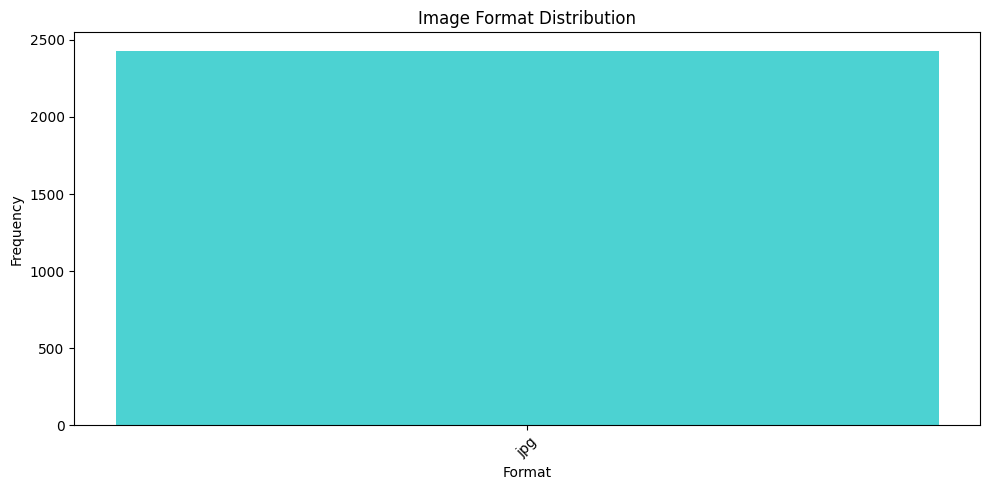

Jumlah Format Gambar
jpg : 2427


In [8]:
#jumlah format gambar
format_counts = Counter(formats)

labels = list(format_counts.keys())
counts = list(format_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Format Distribution')
plt.xlabel('Format')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Jumlah Format Gambar')
for format, counts in format_counts.items():
  print(f'{format} : {counts}')


Dari Plot bar diatas dapat disimpulkan bahwa seluruh gambar pada folder memiliki format gambar jpg

### Menampilkan Beberapa Gambar

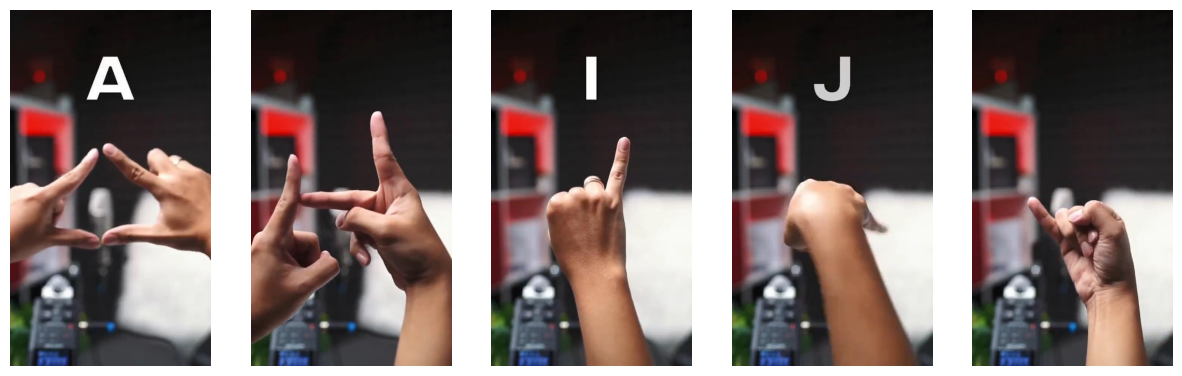

In [9]:
display_all_images(image_folder, num_images=5)  

output diatas menampilkan beberapa gambar dalam folder, sesuai dengan parameter "num_images" yang di input

### Color Distribution

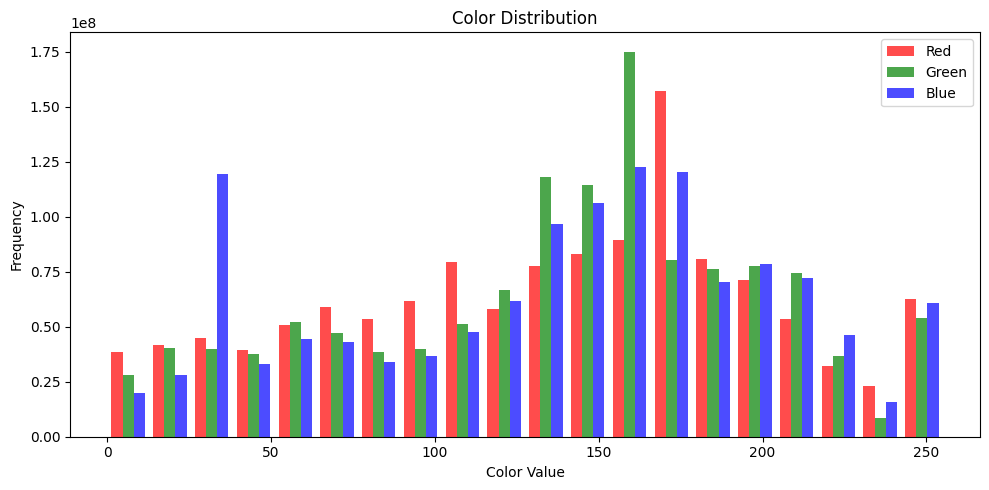

In [27]:
def plot_color_distribution(folder_path):  
    all_colors = []  
      
    # Mengumpulkan semua warna dari setiap gambar dalam folder  
    for filename in os.listdir(folder_path):  
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Memastikan hanya memproses file gambar  
            img_path = os.path.join(folder_path, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  # Pastikan gambar berhasil dibaca  
                # Mengambil semua warna dari gambar  
                colors = img.reshape(-1, 3)  # Mengubah gambar menjadi array 2D  
                all_colors.append(colors)  
            else:  
                print(f"Warning: Could not read image {img_path}")  
  
    # Menggabungkan semua warna menjadi satu array jika ada warna yang valid  
    if all_colors:  
        all_colors = np.vstack(all_colors)  
  
        # Membuat histogram untuk setiap channel warna  
        plt.figure(figsize=(10, 5))  
        plt.hist(all_colors, bins=20, color=['r','g','b'], alpha=0.7, label=['Red', 'Green', 'Blue'] )
        plt.title('Color Distribution')  
        plt.xlabel('Color Value')  
        plt.ylabel('Frequency')  
        plt.tight_layout()
        plt.legend()  
        plt.show()  
    else:  
        print("No valid image data to plot.")  
  
# Panggil fungsi dengan path folder yang berisi gambar Anda   
plot_color_distribution(image_folder) 

dalam histogram diatas secara umum, warna hijau merupakan warna yang lebih dominan dari seluruh gambar, dengan puncak tertinggi pada rentang 160 - 170, sedangkan warna merah dan biru memiliki distribusi yang cukup merata dengan frekuensi biru tertinggi pada rentang 30 - 40 dan frekuensi warna merah tertinggi pada frekuensi 160 - 170. Dalam histrogram diatas juga memiliki variasi warna yang sangat luas, hal ini menunjukkan bahwa gambar gambar yang ada tidak terpaku pada satu warna saja

### Detect Angle of Images

Total keseluruhan gambar : 2427
Gambar dengan sudut aneh: 1262
Gambar dengan sudut Normal: 175


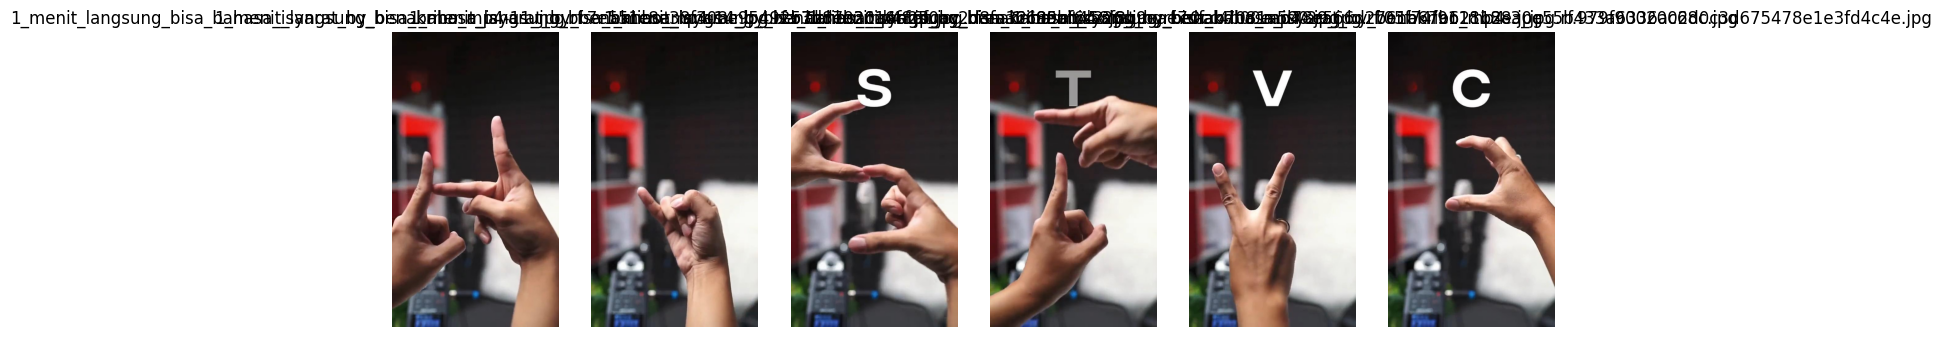

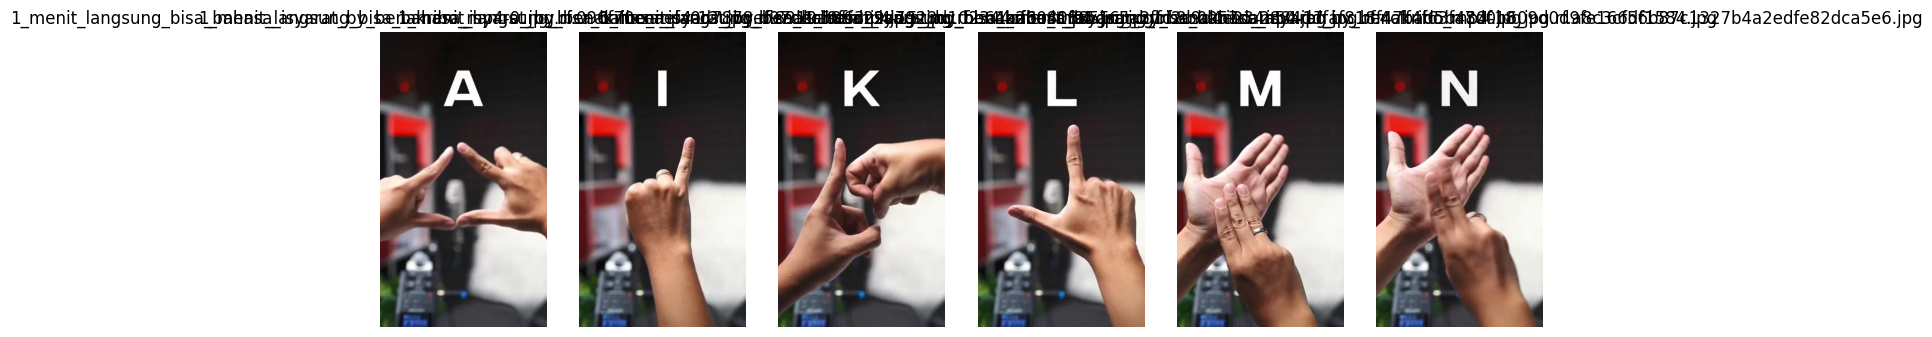

In [11]:
def display_images(images, num_images=5):  
    plt.figure(figsize=(15, 5))  
    for i, (filename, img) in enumerate(images[:num_images]):  # Hanya menampilkan num_images  
        plt.subplot(1, num_images, i + 1)  
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
        plt.title(filename)  
        plt.axis('off')  
    plt.show()

# Fungsi untuk mencari gambar dengan sudut aneh  
def find_images_with_strange_angles(image_folder):  
    strange_images = []  
    normal_images = []
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                # Menghitung sudut menggunakan deteksi tepi  
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #mengubah gambar menjadi grayscale
                edges = cv2.Canny(gray, 200, 300)  #menggunakan garis tepi untuk menemukan tepo dalam gambar
                lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)  #menggunakan transformasi hough untuk mendeteksi gambar

                if lines is not None:  
                    angles = [np.degrees(np.arctan2(np.sin(line[0][1]), np.cos(line[0][1]))) for line in lines]  
                    if any(abs(angle) > 45 for angle in angles):  # mencari gambar yang memiliki Sudut aneh  
                        strange_images.append((filename, img))  # Simpan nama file dan gambar
                    else:
                        normal_images.append((filename, img)) 
  
    return strange_images, normal_images


strange_images, normal_images = find_images_with_strange_angles(image_folder)  
print(f'Total keseluruhan gambar : {len(image_data)}')
print(f'Gambar dengan sudut aneh: {len(strange_images)}')  
print(f'Gambar dengan sudut Normal: {len(normal_images)}') 

if strange_images:  
    display_images(strange_images, num_images=6)  
else:  
    print("Tidak ada gambar dengan sudut aneh ditemukan.")  

if normal_images:  
    display_images(normal_images, num_images=6)  
else:  
    print("Tidak ada gambar dengan sudut aneh ditemukan.") 

Perbandingan antara sudut tidak normal dan gambar dengan sudut yang normal

### Detect Images With CV2

In [53]:
# Memuat gambar dari file  
gambar = cv2.imread('Data_fixed/Images/D-d4103fe0-c201-11eb-a25f-0008ca6b6d30_jpg.rf.3413464c1fdf89f4fb62b9cb7de7615d.jpg')  
  
# Mengonversi gambar ke dalam skala abu-abu  
gambar_abu_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)  
  
# Menggunakan detektor wajah Haar Cascade yang sudah dilatih untuk mendeteksi wajah dalam gambar  
detektor_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  
wajah_terdeteksi = detektor_wajah.detectMultiScale(gambar_abu_abu, scaleFactor=1.1, minNeighbors=5, minSize=(70, 70))  
  
# Menggambar kotak di sekitar wajah yang terdeteksi  
for (x, y, w, h) in wajah_terdeteksi:  
    cv2.rectangle(gambar, (x, y), (x+w, y+h), (255, 0, 0), 2)  
  
# Menampilkan gambar dengan wajah yang terdeteksi  
cv2.imshow('Deteksi Wajah', gambar)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 

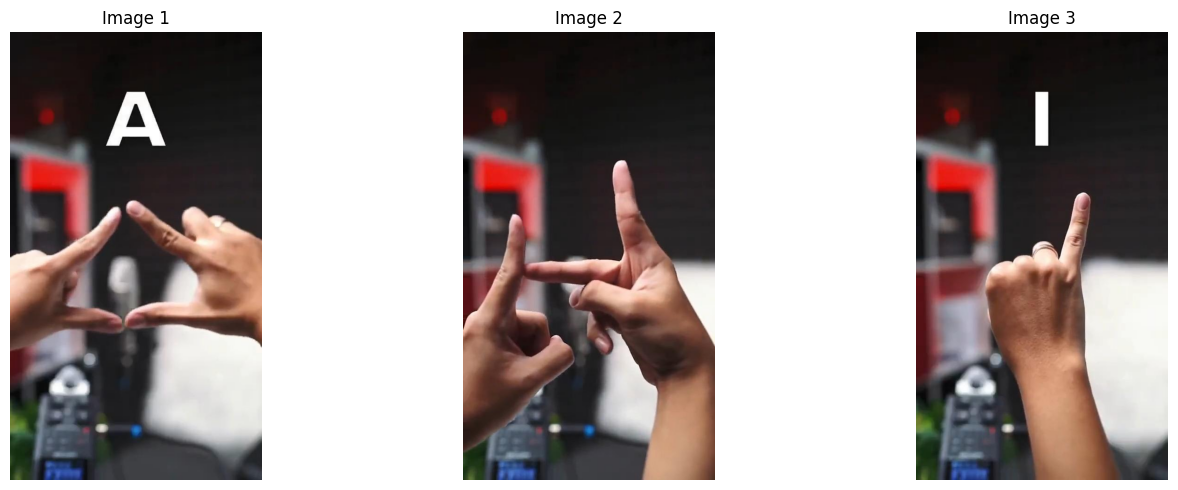

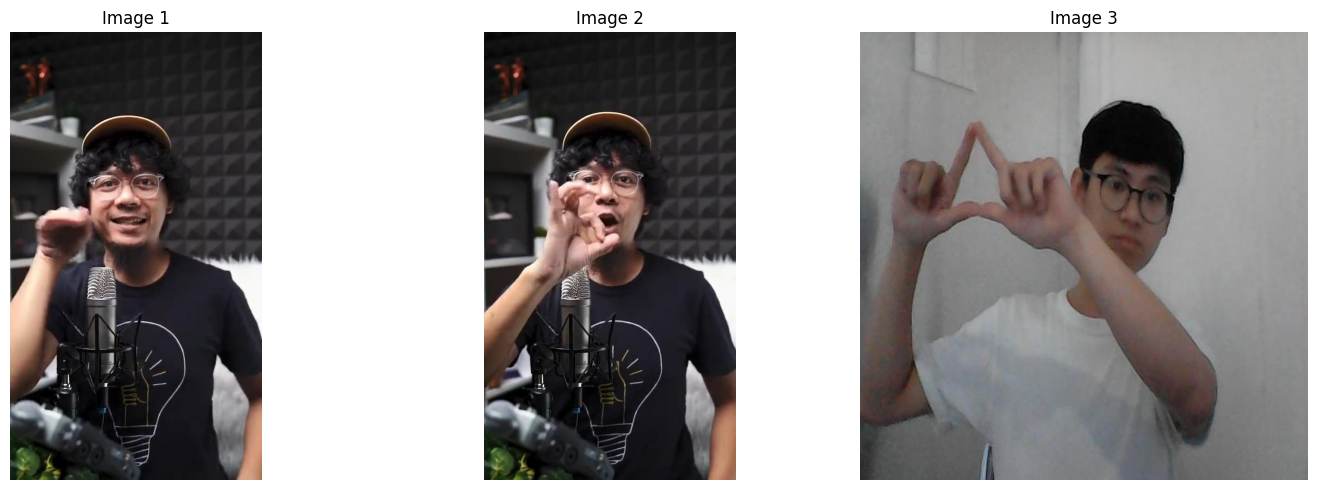

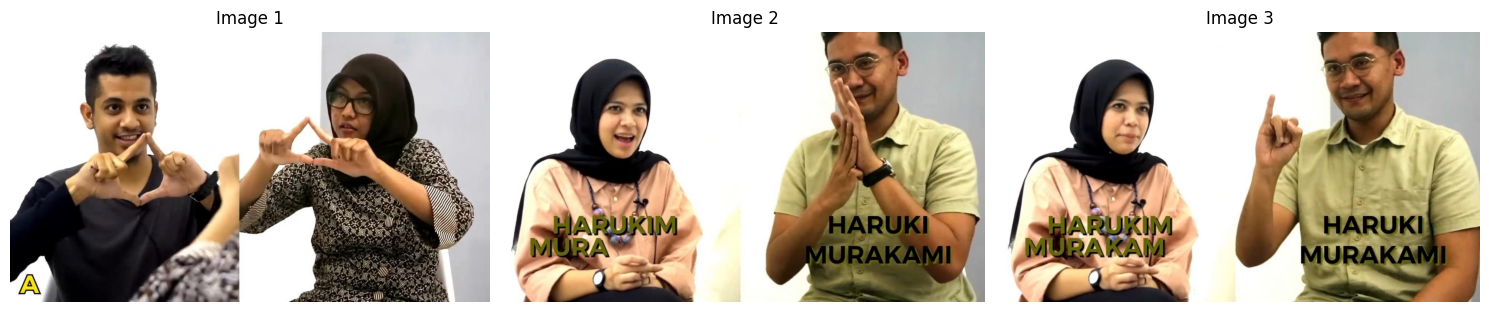

In [ ]:
def display_images(images, titles=None, num_images=3):  
    plt.figure(figsize=(15, 5))  
    for i in range(min(num_images, len(images))):  
        plt.subplot(1, num_images, i + 1)  
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  
        plt.title(titles[i] if titles is not None else f'Image {i + 1}')  
        plt.axis('off')  
    plt.tight_layout()  
    plt.show()  

# Fungsi untuk mendeteksi wajah dalam image  
def face_detection(image):  
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  
    face = face_detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(70, 70))  
    return len(face)  
  
# Fungsi untuk memproses semua image dalam direktori  
def image_processing(directory):  
    no_people = []  
    one_person = []  
    more_than_one_person = []  
      
    for filename in os.listdir(directory):  
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  
            image_path = os.path.join(directory, filename)  
            image = cv2.imread(image_path)  
            if image is None:  
                raise ValueError(f"image tidak dapat dibaca: {filename}")  
            grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
            face_count = face_detection(grey)  
            if face_count == 0:  
               no_people.append(image)  
            elif face_count == 1:  
                one_person.append(image)  
            else:  
                more_than_one_person.append(image)  
                  

      
    return no_people, one_person, more_than_one_person 

no_people, one_person,more_than_one_person = image_processing(image_folder)

if no_people:      
    display_images(no_people, num_images=3)      
else:      
    print("No images with no people found.")      
  
if one_person:      
    display_images(one_person, num_images=3)      
else:      
    print("No images with one person found.")      
  
if more_than_one_person:      
    display_images(more_than_one_person, num_images=3)      
else:     
    print("No images with more than one person found.") 

## Resized Images

* distribusi dimensi gambar
* aspec ratio

In [28]:
def analyze_images(image_folder):  
    image_data = []  
    formats = []  
    color_distributions = []  
      
    for filename in os.listdir(image_folder):  
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(image_folder, filename)  
            img = cv2.imread(img_path)  
            if img is not None:  
                height, width, channels = img.shape  
                image_data.append((filename, height, width))  
                formats.append(filename.split('.')[-1])  
  
    return image_data, formats

# Main  
image_folder = 'Data_fixed/Resized'  # Ganti dengan path folder gambar Anda  
image_data, formats = analyze_images(image_folder)

### Distribusi Dimensi Gambar

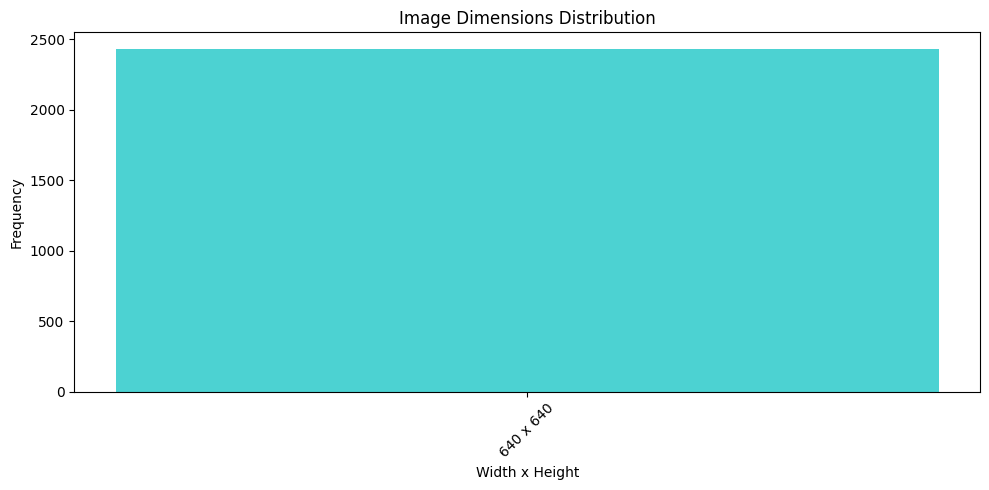

Distribusi dimensi gambar:
Dimensi (640, 640): 2427 gambar


In [29]:
dimensions = [(height, width) for _, height, width in image_data]  
dimension_counts = Counter(dimensions) 

# data labels dan counts untuk visualisasi data
labels = [f"{width} x {height}" for height, width in dimension_counts.keys()] 
counts = list(dimension_counts.values())

# bar chart
plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color='c', alpha=0.7)
plt.title('Image Dimensions Distribution')
plt.xlabel('Width x Height')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Distribusi dimensi gambar:")  
for dim, count in dimension_counts.items():  
    print(f"Dimensi {dim}: {count} gambar")  

### Distribusi Aspect Ratio

Jumlah aspect ratio setiap gambar :
1.0 : 2427


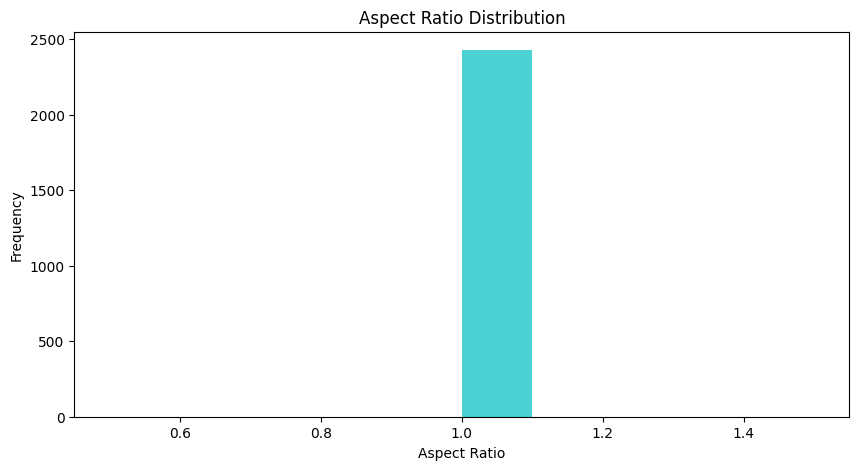

In [30]:
aspect_ratios = [(width / height) for _, height, width in image_data]  

aspect_ratios_counts = Counter(aspect_ratios)

print("Jumlah aspect ratio setiap gambar :")
for label, count in aspect_ratios_counts.items():  
    print(f'{label} : {count}') 

plt.figure(figsize=(10, 5))
plt.hist(aspect_ratios, bins=10, color='c', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()